In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Loading dataset
df = pd.read_csv(r"C:\Users\jjgzz\Downloads\homes.csv")

# Cleaning empty rows
df.dropna(inplace=True)

# Convert 'Sell' column to numeric (Thank you machine Learning)
df['Sell'] = pd.to_numeric(df['Sell'], errors='coerce')
df.dropna(subset=['Sell'], inplace=True)

In [3]:
print(df.describe())

             Sell        List     Living      Rooms       Beds      Baths  \
count   50.000000   50.000000  50.000000  50.000000  50.000000  50.000000   
mean   170.360000  178.340000  21.120000   8.060000   3.820000   1.860000   
std     72.755885   79.382723   8.351072   1.284285   0.690755   0.756199   
min     87.000000   90.000000  10.000000   5.000000   3.000000   1.000000   
25%    135.000000  140.000000  17.000000   7.000000   3.000000   1.000000   
50%    152.000000  160.000000  20.000000   8.000000   4.000000   2.000000   
75%    182.250000  190.000000  22.750000   9.000000   4.000000   2.000000   
max    567.000000  625.000000  64.000000  12.000000   6.000000   4.000000   

              Age      Acres         Taxes  
count   50.000000  50.000000     50.000000  
mean    30.220000   1.020600   3706.100000  
std     30.962314   1.191496   1579.915268  
min      2.000000   0.220000   1445.000000  
25%     12.250000   0.382500   3107.000000  
50%     24.500000   0.550000   3490.

Sell      1.000000
List      0.997433
Taxes     0.899339
Living    0.879381
Baths     0.640059
Rooms     0.560425
Beds      0.335113
Acres     0.168713
Age      -0.147343
Name: Sell, dtype: float64


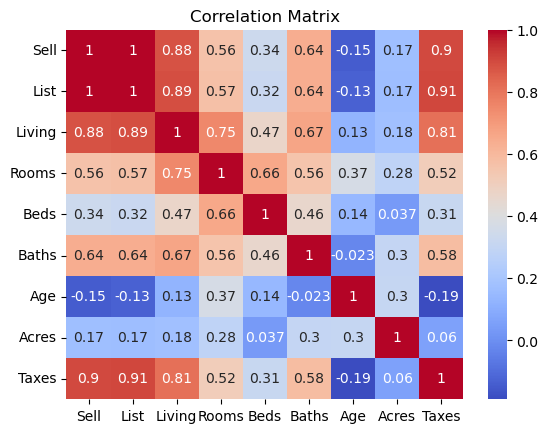

In [17]:
#List, taxes, living show high correlations with sell. Age is the only negatively correlated. 
print(df.corr()['Sell'].sort_values(ascending=False))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

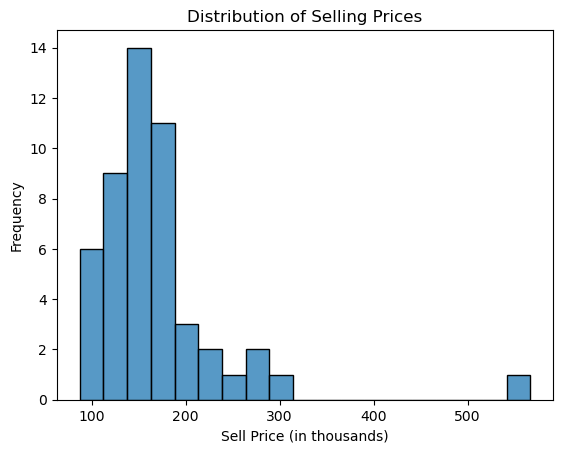

In [19]:
#distribution skews to the right, there seems to be some luxury property on the market. 
sns.histplot(df['Sell'])
plt.title("Distribution of Selling Prices")
plt.xlabel("Sell Price (in thousands)")
plt.ylabel("Frequency")
plt.show()

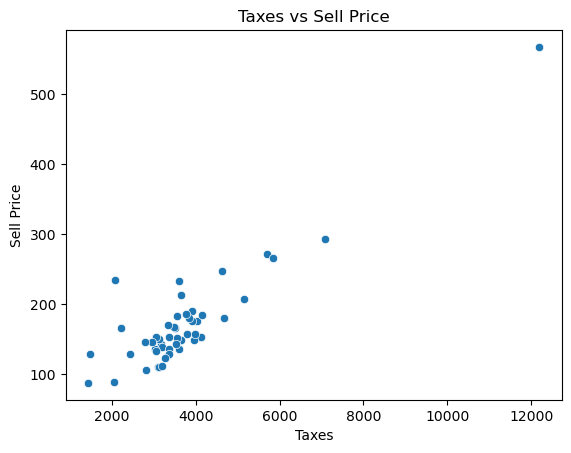

In [23]:
#Scatterplot shows positive correlation between Taxes and Sell, even with the outlier property. We'll review the regression. 
sns.scatterplot(x='Taxes', y='Sell', data=df)
plt.title("Taxes vs Sell Price")
plt.xlabel("Taxes")
plt.ylabel("Sell Price")
plt.show()

In [53]:
#looking at R^2, about 81% of variance is explained by this regression. P value is low, so taxes can be used as a predictor for sell price. 
X_taxes = sm.add_constant(df['Taxes'])
y = df['Sell']
reg_taxes = sm.OLS(y, X_taxes).fit()
print(model_taxes.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        17:18:09   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

In [55]:
#Here we see about 77% of variance explained. P value is also low, so living area is still statistically significant. 
#however, it's not the strongest predicting factor. 
X_living = sm.add_constant(df['Living'])
reg_living = sm.OLS(y, X_living).fit()
print(model_living.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           4.39e-17
Time:                        17:18:14   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

In [61]:
#taxes is the better regression, but we're only analyzing one variable at at time. 
#It could be that we have a stronger prediction by plugging more variables in. 
print(f"Taxes R²: {reg_taxes.rsquared:.3f}")
print(f"Living R²: {reg_living.rsquared:.3f}")

Taxes R²: 0.809
Living R²: 0.773
